Step1: Load & Display Image with PIL

Original size: (500, 668)
Mode: RGB


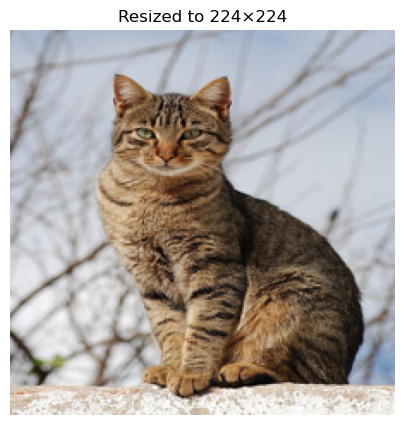

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Load image
img = Image.open("cat.jpg").convert("RGB")
print(f"Original size: {img.size}")
print(f"Mode: {img.mode}")

# Resize to 224x224 (if needed)
img_resized = img.resize((224, 224))

# Display
plt.figure(figsize=(5, 5))
plt.imshow(img_resized)
plt.title("Resized to 224×224")
plt.axis('off')
plt.show()

# Save
img_resized.save("cat.jpg")

Step 2: Convert to TensorFlow Tensor
This is the critical step for TensorFlow models.

In [3]:
import tensorflow as tf

# Method 1: Using tf.keras.utils.load_img (recommended)
img_tf = tf.keras.utils.load_img("cat.jpg", target_size=(224, 224))
tensor = tf.keras.utils.img_to_array(img_tf)  # Shape: (224, 224, 3)

print(f"Tensor shape (HWC): {tensor.shape}")
print(f"Data type: {tensor.dtype}")
print(f"Pixel range: [{tensor.min():.1f}, {tensor.max():.1f}]")  # Should be [0.0, 255.0]

Tensor shape (HWC): (224, 224, 3)
Data type: float32
Pixel range: [0.0, 255.0]


Step 3: Convert to Model-Ready Format (NHWC)
TensorFlow uses NHWC format by default (batch, height, width, channels).

In [4]:
# Add batch dimension → (1, 224, 224, 3)
tensor_batch = tf.expand_dims(tensor, axis=0)

print(f"Batch tensor shape: {tensor_batch.shape}")

# Optional: Normalize to [0, 1] (common for training)
tensor_norm = tensor_batch / 255.0

print(f"Normalized range: [{tensor_norm.numpy().min():.3f}, {tensor_norm.numpy().max():.3f}]")

Batch tensor shape: (1, 224, 224, 3)
Normalized range: [0.000, 1.000]


Step 4: Reconstruct & Verify

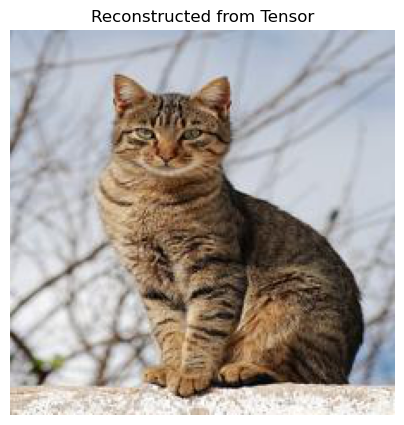

✅ TensorFlow image loading pipeline verified!


In [5]:
# Convert back to numpy for display
img_recon = tensor_norm[0].numpy()  # Remove batch dim

plt.figure(figsize=(5, 5))
plt.imshow(img_recon)
plt.title("Reconstructed from Tensor")
plt.axis('off')
plt.show()

print("✅ TensorFlow image loading pipeline verified!")